# 1. book.csv

In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
#import dataset
books_df = pd.read_csv("book.csv")
books_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## 1.1. Algorithm with different support value and confidence value

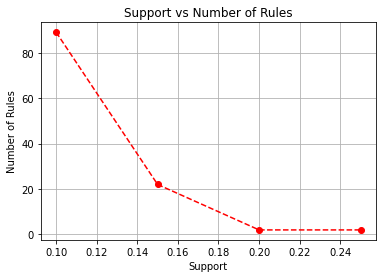

In [3]:
#Rules with support = [0.1,0.15,0.2,0.25] and confidence = 0.3
support=[0.1,0.15,0.2,0.25]
rules_1_count=[]

for x in support:
    frequent_sets_1 = apriori(books_df,min_support=x,use_colnames=True)
    rules_1 = association_rules(frequent_sets_1, metric="confidence", min_threshold=0.3)
    rules_1_count.append(rules_1["antecedents"].count())
    
#Plot for number of rules for different support values    
plt.plot(support,rules_1_count,"ro",linestyle="dashed")
plt.title("Support vs Number of Rules")
plt.xlabel("Support")
plt.ylabel("Number of Rules")
plt.grid()
plt.show()

In [4]:
#Rules with support = 0.2 and confidence = 0.5
frequent_sets_2 = apriori(books_df,min_support=0.2,use_colnames=True)
rules_2 = association_rules(frequent_sets_2, metric="confidence", min_threshold=0.5)

rules_2.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


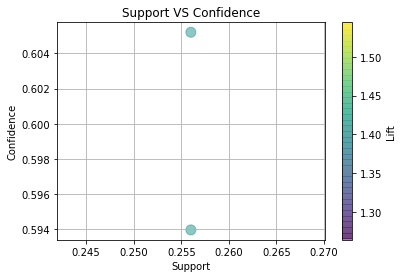

In [5]:
#Support vs Confidence of rules when support >= 0.2 and confidence >= 0.5
plt.scatter(rules_2["support"],rules_2["confidence"],alpha=0.5,s=100,c=rules_2["lift"])
cbar= plt.colorbar()
cbar.set_label("Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

## 1.2.  Algorithm with different maximum length

In [6]:
#Rules with maximum length = 3
frequent_sets_3 = apriori(books_df,min_support=0.1,use_colnames=True,max_len=3)
rules_3 = association_rules(frequent_sets_3, metric="confidence", min_threshold=0.4)
#Number of rules
rules_3.count()

antecedents           70
consequents           70
antecedent support    70
consequent support    70
support               70
confidence            70
lift                  70
leverage              70
conviction            70
dtype: int64

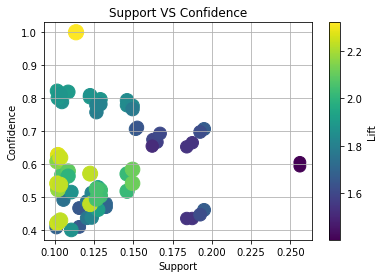

In [7]:
#Support vs Confidence of rules with maximum length = 3
plt.scatter(rules_3["support"],rules_3["confidence"],s=rules_3["lift"]*100,c=rules_3["lift"])
cbar= plt.colorbar()
cbar.set_label("Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

In [8]:
#Rules with maximum length = 2 
frequent_sets_4 = apriori(books_df,min_support=0.1,use_colnames=True,max_len=2)
rules_4 = association_rules(frequent_sets_4,metric="confidence", min_threshold=0.4)
rules_4.count()

antecedents           32
consequents           32
antecedent support    32
consequent support    32
support               32
confidence            32
lift                  32
leverage              32
conviction            32
dtype: int64

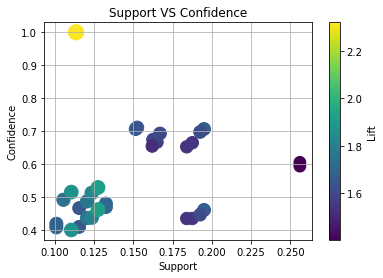

In [9]:
#Support VS Confidence of rules with maximum length = 2
plt.scatter(rules_4["support"],rules_4["confidence"],s=rules_4["lift"]*100, c=rules_4["lift"]  )

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

# -------------------------------------------------------------------------------------------------------

# 2. my_movies.csv

In [10]:
#import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
#dataset : my_movies.csv
movies_df = pd.read_csv("my_movies.csv")
movies_df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## 2.1. Algorithm with different support value and confidence value

In [12]:
#Rules with support = 0.1 and confidence = 0.4
movies_dff = movies_df.iloc[:,5:]
frequent_mset_1 = apriori(movies_dff,min_support=0.1,use_colnames=True)
rules_m1 = association_rules(frequent_mset_1,metric="confidence",min_threshold=0.4)
rules_m1.count()

antecedents           216
consequents           216
antecedent support    216
consequent support    216
support               216
confidence            216
lift                  216
leverage              216
conviction            216
dtype: int64

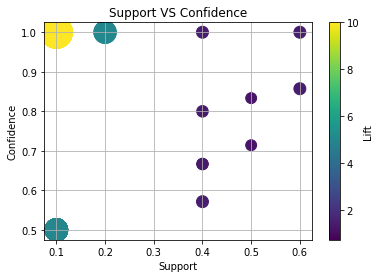

In [13]:
#Support VS Confidence of rules with support > 0.1 and confidence > 0.4

plt.scatter(rules_m1["support"],rules_m1["confidence"],s=rules_m1["lift"]*100, c=rules_m1["lift"])

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

In [14]:
#Rules with support = 0.2 and confidence = 0.5
frequent_mset_2 = apriori(movies_dff,min_support=0.2,use_colnames=True)
rules_m2 = association_rules(frequent_mset_2,metric="confidence",min_threshold=0.5)
rules_m2.count()

antecedents           15
consequents           15
antecedent support    15
consequent support    15
support               15
confidence            15
lift                  15
leverage              15
conviction            15
dtype: int64

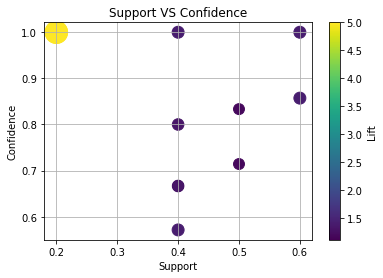

In [15]:
#Support VS Confidence of rules with support > 0.2 and confidence > 0.5
plt.scatter(rules_m2["support"],rules_m2["confidence"],s=rules_m2["lift"]*100, c=rules_m2["lift"]  )

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

## 2.2.  Algorithm with different maximum length

In [16]:
#Rules with maximum length = 4
frequent_mset_3 = apriori(movies_dff,min_support=0.1,use_colnames=True,max_len=4)
rules_m3 = association_rules(frequent_mset_3,metric="confidence",min_threshold=0.4)
rules_m3.count()

antecedents           187
consequents           187
antecedent support    187
consequent support    187
support               187
confidence            187
lift                  187
leverage              187
conviction            187
dtype: int64

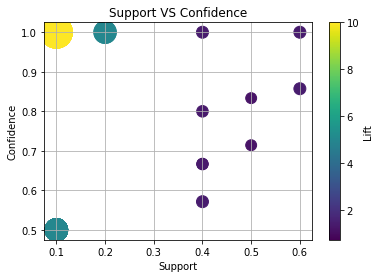

In [17]:
#Support VS Confidence of rules with maximum length = 4
plt.scatter(rules_m3["support"],rules_m3["confidence"],s=rules_m3["lift"]*100, c=rules_m3["lift"]  )

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()

In [18]:
#Rules with maximum length = 2
frequent_mset_4 = apriori(movies_dff,min_support=0.1,use_colnames=True,max_len=2)
rules_m4 = association_rules(frequent_mset_4,metric="confidence",min_threshold=0.5)
rules_m4.count()

antecedents           31
consequents           31
antecedent support    31
consequent support    31
support               31
confidence            31
lift                  31
leverage              31
conviction            31
dtype: int64

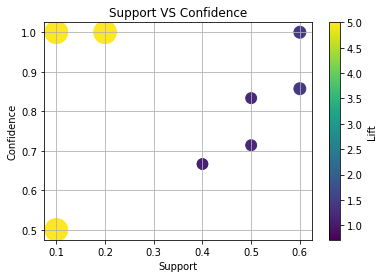

In [19]:
#Support VS Confidence of rules with maximum length = 2
plt.scatter(rules_m4["support"],rules_m4["confidence"],s=rules_m4["lift"]*100, c=rules_m4["lift"]  )

plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support VS Confidence")
plt.grid()
plt.show()